# Declarative Modeling Example

Declarative approach to modeling means that one could define or update a model using a fragment of structured text. A number of fragments could be "played" against a model in a sequence to build it up.

Enabling declarative modeling for Capella models enables a range of complex automations around modeling process that are explainable / transparent to human auditors.

This notebook will demonstrate a basic application of this approach to modeling on a coffee machine example. Please note that we will not model any specific modeling process but rather a "free-form" demo.

## System Analysis of a Coffee Machine

Lets do a quick system analysis of a coffee machine. Lets assume that our meta-solution is an automated coffee machine for a household use. We may look into variant management scenario in a separate example.

### 0. Initialize

But before we can model something lets first initialize the model. We will use an empty Capella 5.2 model as a starting point.

In [1]:
import capellambse
import io
from capellambse import decl

model = capellambse.MelodyModel(
    "../../../tests/data/decl/empty_project_52/empty_project_52.aird",
    jupyter_untrusted=True
)

Cannot load PVMT extension: ValueError: Provided model does not have a PropertyValuePkg
Property values are not available in this model


to visualize the modeling results we'll use context-diagrams extension, you may get one by uncommenting and running the command below

In [2]:
#!pip install capellambse_context_diagrams

lets verify that the model is empty at SA layer:

In [3]:
functions_allocated = model.sa.root_component.allocated_functions
functions_available = model.sa.root_function.functions
print(f"At SA layer the model has {len(functions_available)}, out of which {len(functions_allocated)} are allocated to Root Component")

At SA layer the model has 0, out of which 0 are allocated to Root Component


Also for this to work we'll need "coordinates" of some key elements in the model:

In [4]:
root_function = model.sa.root_function
root_component = model.sa.root_component
structure = model.sa.component_package

### 1. Context

Lets start by renaming the root component from **System** to **Coffee Machine**, creating a human actor **User** and a component exchange between those two.

We can achieve this by applying the following YAML patch to an empty Capella model:

In [5]:
model_update = f"""
- parent: !uuid {root_component.uuid}
  modify:
    name: Coffee Machine
- parent: !uuid {root_component.uuid}
  extend:
    ports:
      - name: usr
        direction: INOUT
        promise_id: usr-port-promise
    exchanges:
      - name: user interactions
        source: !promise usr-port-promise
        target: !promise cm-port-promise
- parent: !uuid {structure.uuid}
  extend:
    components:
      - name: User
        is_actor: true
        is_human: true
        ports:
          - name: cm
            direction: INOUT
            promise_id: cm-port-promise
"""
# the below line applies the model_update to the model
decl.apply(model, io.StringIO(model_update))

and now we can verify the changes by visualizing the context of our system under analysis:

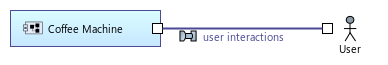

In [6]:
root_component.context_diagram

Please note: the changes we made are not yet stored - if you like those to be saved you may use `model.save()` method. This will save the model back to where it was loaded from, for example by writing back into local files, or by creating a Git commit and pushing it back to the remote.
